# Load Model and Data

In [1]:
import pickle
import pandas as pd
model = pickle.load(open('../models/health_model.pkl', 'rb'))
data = pd.read_csv('../data/processed/health_clean_other.csv')

# Final Evaluation

In [2]:
from sklearn.metrics import classification_report
X = data.drop(columns=['TenYearCHD', 'age_bins'])
y = data['TenYearCHD']

y_pred = model.predict(X)
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3596
           1       0.88      0.18      0.30       644

    accuracy                           0.87      4240
   macro avg       0.88      0.59      0.62      4240
weighted avg       0.87      0.87      0.83      4240



In [3]:
from fpdf import FPDF

# Create a PDF class to format the text
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(200, 10, 'Classification Report', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, 'Page %s' % self.page_no(), 0, 0, 'C')

# Instantiate PDF object
pdf = PDF()
pdf.add_page()

# Set font for the body of the PDF
pdf.set_font('Arial', '', 12)

# Add the report text to the PDF
for line in report.split('\n'):
    pdf.cell(200, 10, line, 0, 1)

# Save the PDF to a file
pdf_file_path = "../reports/classification_report.pdf"
pdf.output(pdf_file_path)

print(f"Classification report saved to {pdf_file_path}")

Classification report saved to ../reports/classification_report.pdf


# Confusion Matrix

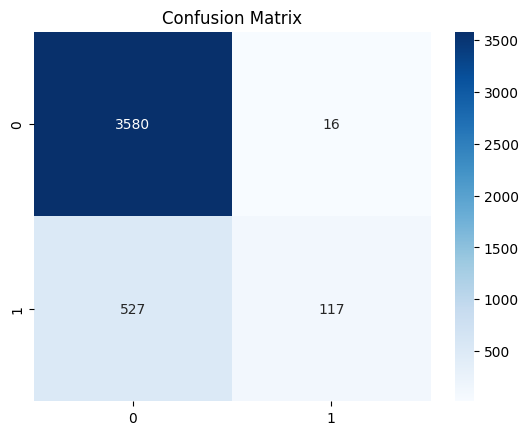

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.savefig('../reports/plots/final_model/confusion_matrix.png')
plt.show()